<a href="https://colab.research.google.com/github/MeghanaKuruvadi/CODSOFT/blob/main/Face_Detection_and_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 1.jpeg to 1.jpeg


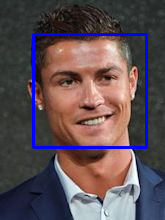

In [4]:
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow

def detect_faces(img_path):
    cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cascade_path)

    if face_cascade.empty():
        print("Failed to load cascade classifier!")
        return
    img = cv2.imread(img_path)

    if img is None:
        print("Failed to read image!")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the output in Google Colab
    cv2_imshow(img)

# Upload the image
uploaded = files.upload()

# Use the uploaded image as input
for file_name in uploaded.keys():
    detect_faces('1.jpeg')


In [5]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=544990ddd95e3fa0f63455f82cca74331f47e9c5df99fe4049101d44c199fa3d
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Please upload images to check:


Saving 2.jpeg to 2.jpeg
Checking image: 2.jpeg
This is the known person!


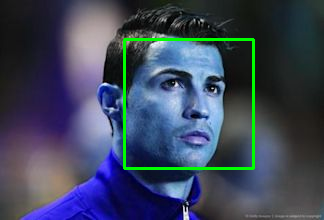


-----------------------------------------



In [9]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Load the image of the person you want to recognize
known_image = face_recognition.load_image_file('1.jpeg')
known_encoding = face_recognition.face_encodings(known_image)[0]

# Upload multiple images to check
print("Please upload images to check:")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"Checking image: {fn}")
    unknown_image_path = fn

    # Load and encode the uploaded image
    unknown_image = face_recognition.load_image_file(unknown_image_path)
    unknown_encodings = face_recognition.face_encodings(unknown_image)

    # Check if the person in the unknown image matches the known person
    if len(unknown_encodings) > 0:  # Ensure that at least one face is detected
        results = face_recognition.compare_faces([known_encoding], unknown_encodings[0])

        if results[0]:
            print("This is the known person!")
            # Draw a box around the recognized face
            face_locations = face_recognition.face_locations(unknown_image)
            for top, right, bottom, left in face_locations:
                cv2.rectangle(unknown_image, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2_imshow(unknown_image)
        else:
            print("This is NOT the known person.")
    else:
        print("No faces detected in the image.")

    print("\n-----------------------------------------\n")


Please upload images to check:


Saving 3.jpeg to 3 (2).jpeg
Checking image: 3 (2).jpeg
This is NOT the known person.


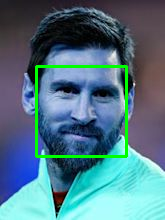


-----------------------------------------



In [12]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Load the image of the person you want to recognize
known_image = face_recognition.load_image_file('1.jpeg')
known_encoding = face_recognition.face_encodings(known_image)[0]

# Upload multiple images to check
print("Please upload images to check:")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"Checking image: {fn}")
    unknown_image_path = fn

    # Load and encode the uploaded image
    unknown_image = face_recognition.load_image_file(unknown_image_path)
    unknown_encodings = face_recognition.face_encodings(unknown_image)

    # Check if the person in the unknown image matches the known person
    if len(unknown_encodings) > 0:  # Ensure that at least one face is detected
        results = face_recognition.compare_faces([known_encoding], unknown_encodings[0])

        if results[0]:
            print("\nThis is the known person!\n")
            # Draw a box around the recognized face
            face_locations = face_recognition.face_locations(unknown_image)
            for top, right, bottom, left in face_locations:
                cv2.rectangle(unknown_image, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2_imshow(unknown_image)
        else:
            print("This is NOT the known person.")
            face_locations = face_recognition.face_locations(unknown_image)
            for top, right, bottom, left in face_locations:
                cv2.rectangle(unknown_image, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2_imshow(unknown_image)
    else:
        print("No faces detected in the image.")

    print("\n-----------------------------------------\n")
